<a href="https://colab.research.google.com/github/Nirdesh-arc/Concept-And-Technologies-Of-AI-Final-Assignment/blob/main/2509474_NirdeshKhadka_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Portfolio Project 2026 - Regression Task
## Landslide Fatality Prediction

**Student Name:** Nirdesh Khadka  
**WLV ID:** 2509474  
**Date:** February 10, 2026

**UN SDG Alignment:**
- SDG 11: Sustainable Cities and Communities
- SDG 13: Climate Action

## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

print("Libraries imported successfully!")

Libraries imported successfully!


## 1. Load and Explore Data

In [ ]:
# Load dataset
df = pd.read_csv('/content/Global_Landslide_Catalog_Export_rows.csv')

print("Dataset Shape:", df.shape)
print("\nFirst few rows:")
df.head()

Dataset Shape: (11033, 31)

First few rows:


,source_name,source_link,event_id,event_date,event_time,event_title,event_description,location_description,location_accuracy,landslide_category,...,country_code,admin_division_name,admin_division_population,gazeteer_closest_point,gazeteer_distance,submitted_date,created_date,last_edited_date,longitude,latitude
0,AGU,https://blogs.agu.org/landslideblog/2008/10/14...,684,08/01/2008 12:00:00 AM,NaN,"Sigou Village, Loufan County, Shanxi Province","occurred early in morning, 11 villagers buried...","Sigou Village, Loufan County, Shanxi Province",unknown,landslide,...,CN,Shaanxi,0.0,Jingyang,41.02145,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,107.4500,32.5625
1,Oregonian,http://www.oregonlive.com/news/index.ssf/2009/...,956,01/02/2009 02:00:00 AM,NaN,"Lake Oswego, Oregon",Hours of heavy rain are to blame for an overni...,"Lake Oswego, Oregon",5km,mudslide,...,US,Oregon,36619.0,Lake Oswego,0.60342,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,-122.6630,45.4200
2,CBS News,https://www.cbsnews.com/news/dozens-missing-af...,973,01/19/2007 12:00:00 AM,NaN,"San Ramon district, 195 miles northeast of the...",(CBS/AP) At least 10 people died and as many a...,"San Ramon district, 195 miles northeast of the...",10km,landslide,...,PE,Junín,14708.0,San Ramón,0.85548,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,-75.3587,-11.1295
3,Reuters,https://in.reuters.com/article/idINIndia-41450...,1067,07/31/2009 12:00:00 AM,NaN,Dailekh district,"One person was killed in Dailekh district, pol...",Dailekh district,unknown,landslide,...,NP,Mid Western,20908.0,Dailekh,0.75395,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,81.7080,28.8378
4,The Freeman,http://www.philstar.com/cebu-news/621414/lands...,2603,10/16/2010 12:00:00 PM,NaN,sitio Bakilid in barangay Lahug,Another landslide in sitio Bakilid in barangay...,sitio Bakilid in barangay Lahug,5km,landslide,...,PH,Central Visayas,798634.0,Cebu City,2.02204,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,123.8978,10.3336


In [ ]:
# Dataset information
print("Dataset Information:")
df.info()
print("\nStatistical Summary:")
df.describe()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11033 entries, 0 to 11032
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   source_name                11033 non-null  object 
 1   source_link                10187 non-null  object 
 2   event_id                   11033 non-null  int64  
 3   event_date                 11033 non-null  object 
 4   event_time                 0 non-null      float64
 5   event_title                11033 non-null  object 
 6   event_description          10171 non-null  object 
 7   location_description       10931 non-null  object 
 8   location_accuracy          11031 non-null  object 
 9   landslide_category         11032 non-null  object 
 10  landslide_trigger          11010 non-null  object 
 11  landslide_size             11024 non-null  object 
 12  landslide_setting          10964 non-null  object 
 13  fatality_count           

,event_id,event_time,fatality_count,injury_count,event_import_id,admin_division_population,gazeteer_distance,longitude,latitude
count,11033.000000,0.0,9648.000000,5359.000000,9471.000000,9.471000e+03,9471.000000,11033.000000,11033.000000
mean,5598.953141,NaN,3.219424,0.751819,4798.563070,1.577600e+05,11.873689,2.520441,25.881887
std,3249.228647,NaN,59.886178,8.458955,2789.125559,8.297345e+05,15.598228,100.908393,20.415054
min,1.000000,NaN,0.000000,0.000000,-111.167300,0.000000e+00,0.000030,-179.980766,-46.774800
25%,2785.000000,NaN,0.000000,0.000000,2386.500000,1.963000e+03,2.363845,-107.871700,13.917600
50%,5563.000000,NaN,0.000000,0.000000,4773.000000,7.365000e+03,6.254870,19.694600,30.534500
75%,8435.000000,NaN,1.000000,0.000000,7189.500000,3.402100e+04,15.815610,93.948000,40.866259
max,11221.000000,NaN,5000.000000,374.000000,9669.000000,1.269184e+07,215.448880,179.991364,72.627500


### Dataset Details:

**Source:** Global Landslide Catalog maintained by NASA  
**Collection Period:** 2007-2017  
**Access Method:** Public scientific database

**Alignment with UN SDGs:**
- **SDG 11:** Sustainable Cities and Communities - Understanding landslide risks helps create resilient settlements
- **SDG 13:** Climate Action - Many landslides are triggered by climate-related events (heavy rainfall, storms)

**Key Questions This Dataset Can Answer:**
1. Can we predict the number of fatalities based on landslide characteristics?
2. What factors contribute most to deadly landslides?
3. How do different landslide triggers affect fatality outcomes?

In [ ]:
# Target variable analysis
print("Target Variable: fatality_count")
print("=" * 60)
print(f"Total landslides: {len(df)}")
print(f"With fatality data: {df['fatality_count'].notna().sum()}")
print(f"Missing data: {df['fatality_count'].isna().sum()}")

print("\nFatality statistics (non-zero):")
fatalities_nonzero = df[df['fatality_count'] > 0]['fatality_count']
print(fatalities_nonzero.describe())

Target Variable: fatality_count
Total landslides: 11033
With fatality data: 9648
Missing data: 1385

Fatality statistics (non-zero):
count    2442.000000
mean       12.719492
std       118.543805
min         1.000000
25%         1.000000
50%         3.000000
75%         7.000000
max      5000.000000
Name: fatality_count, dtype: float64


In [ ]:
# Missing values
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({'Count': missing, 'Percentage': missing_pct})
missing_df = missing_df[missing_df['Count'] > 0].sort_values('Count', ascending=False)

print("Missing Values (Top 10):")
print(missing_df.head(10))

Missing Values (Top 10):
                           Count  Percentage
event_time                 11033  100.000000
notes                      10716   97.126801
storm_name                 10456   94.770235
photo_link                  9537   86.440678
injury_count                5674   51.427536
admin_division_name         1637   14.837306
country_code                1564   14.175655
event_import_source         1563   14.166591
gazeteer_closest_point      1563   14.166591
admin_division_population   1562   14.157527


## 2. Data Preprocessing

In [ ]:
# Keep records with fatality data
df_clean = df[df['fatality_count'].notna()].copy()
print(f"Dataset size after cleaning: {len(df_clean)}")

# Fill missing with 0
df_clean['fatality_count'] = df_clean['fatality_count'].fillna(0)

# Select relevant features
relevant_cols = ['landslide_category', 'landslide_trigger', 'landslide_size',
                 'landslide_setting', 'country_name', 'latitude', 'longitude',
                 'fatality_count']

df_model = df_clean[relevant_cols].copy()

print(f"\nWorking dataset shape: {df_model.shape}")
print("\nTarget distribution:")
print(df_model['fatality_count'].describe())

Dataset size after cleaning: 9648

Working dataset shape: (9648, 8)

Target distribution:
count    9648.000000
mean        3.219424
std        59.886178
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max      5000.000000
Name: fatality_count, dtype: float64


In [ ]:
# Final feature set
feature_columns = ['landslide_category_encoded', 'landslide_trigger_encoded',
                   'landslide_size_encoded', 'landslide_setting_encoded',
                   'country_name_encoded', 'latitude', 'longitude']

# Encode categorical features
# Initialize LabelEncoder
le = LabelEncoder()

categorical_cols = ['landslide_category', 'landslide_trigger', 'landslide_size',
                    'landslide_setting', 'country_name']

for col in categorical_cols:
    # Fill NaN values with a placeholder string before encoding
    # This ensures LabelEncoder doesn't raise an error and treats NaNs as a distinct category
    df_model[col] = df_model[col].fillna('Missing')
    df_model[f'{col}_encoded'] = le.fit_transform(df_model[col])

X = df_model[feature_columns]
y = df_model['fatality_count']

# CRITICAL IMPROVEMENT: Log-transform the target variable to handle extreme skewness
# This is a standard practice for count data with high variance
y_transformed = np.log1p(y)  # log1p = log(1 + y) to handle zeros

print("Feature matrix shape:", X.shape)
print("Target shape:", y.shape)
print("\nFeatures:")
for i, col in enumerate(feature_columns, 1):
    print(f"{i}. {col}")

print("\n" + "="*60)
print("TARGET TRANSFORMATION (Log Transform):")
print("="*60)
print(f"Original target - Mean: {y.mean():.2f}, Std: {y.std():.2f}, Skewness: {y.skew():.2f}")
print(f"Transformed target - Mean: {y_transformed.mean():.2f}, Std: {y_transformed.std():.2f}, Skewness: {y_transformed.skew():.2f}")
print("Note: Log transformation reduces skewness and helps models perform better")
print("="*60)

Feature matrix shape: (9648, 7)
Target shape: (9648,)

Features:
1. landslide_category_encoded
2. landslide_trigger_encoded
3. landslide_size_encoded
4. landslide_setting_encoded
5. country_name_encoded
6. latitude
7. longitude

TARGET TRANSFORMATION (Log Transform):
Original target - Mean: 3.22, Std: 59.89, Skewness: 67.61
Transformed target - Mean: 0.41, Std: 0.85, Skewness: 2.55
Note: Log transformation reduces skewness and helps models perform better


## 3. Exploratory Data Analysis

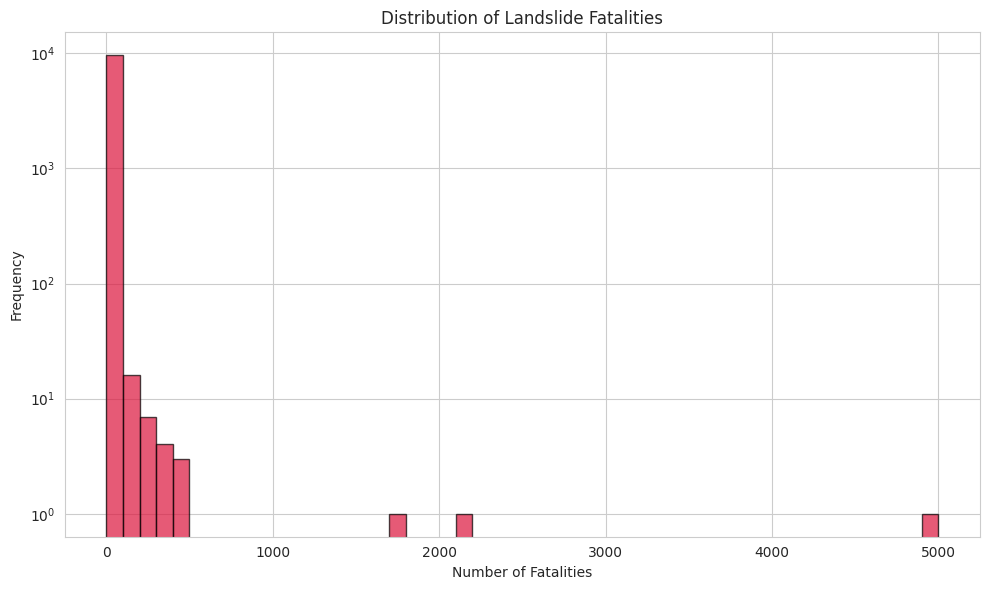

In [ ]:
# Distribution of fatalities
plt.figure(figsize=(10, 6))
plt.hist(df_model['fatality_count'], bins=50, color='crimson', edgecolor='black', alpha=0.7)
plt.xlabel('Number of Fatalities')
plt.ylabel('Frequency')
plt.title('Distribution of Landslide Fatalities')
plt.yscale('log')
plt.tight_layout()
plt.show()

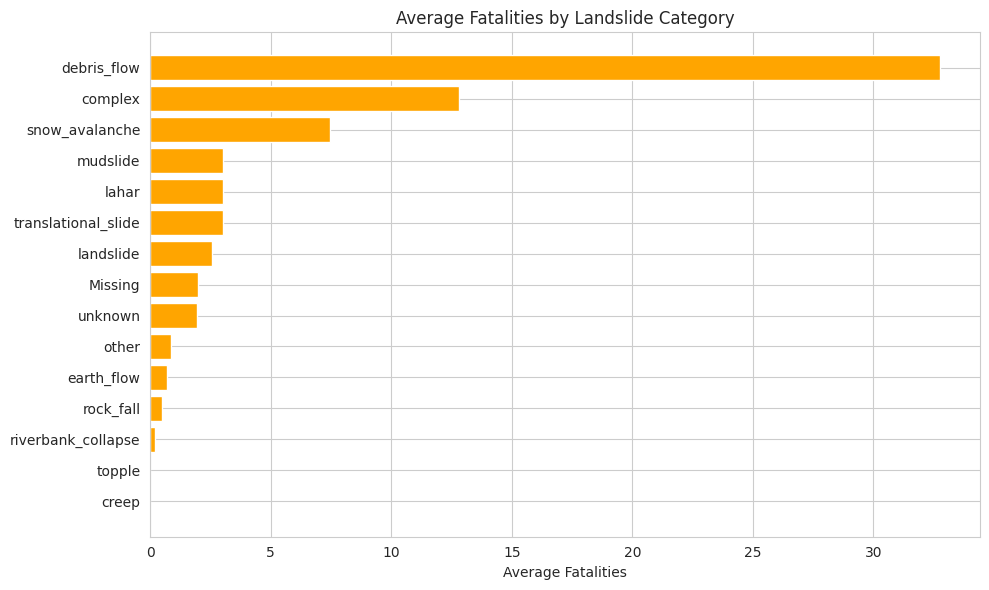

In [ ]:
# Fatalities by category
category_fatalities = df_model.groupby('landslide_category')['fatality_count'].mean().sort_values()

plt.figure(figsize=(10, 6))
plt.barh(range(len(category_fatalities)), category_fatalities.values, color='orange')
plt.yticks(range(len(category_fatalities)), category_fatalities.index)
plt.xlabel('Average Fatalities')
plt.title('Average Fatalities by Landslide Category')
plt.tight_layout()
plt.show()

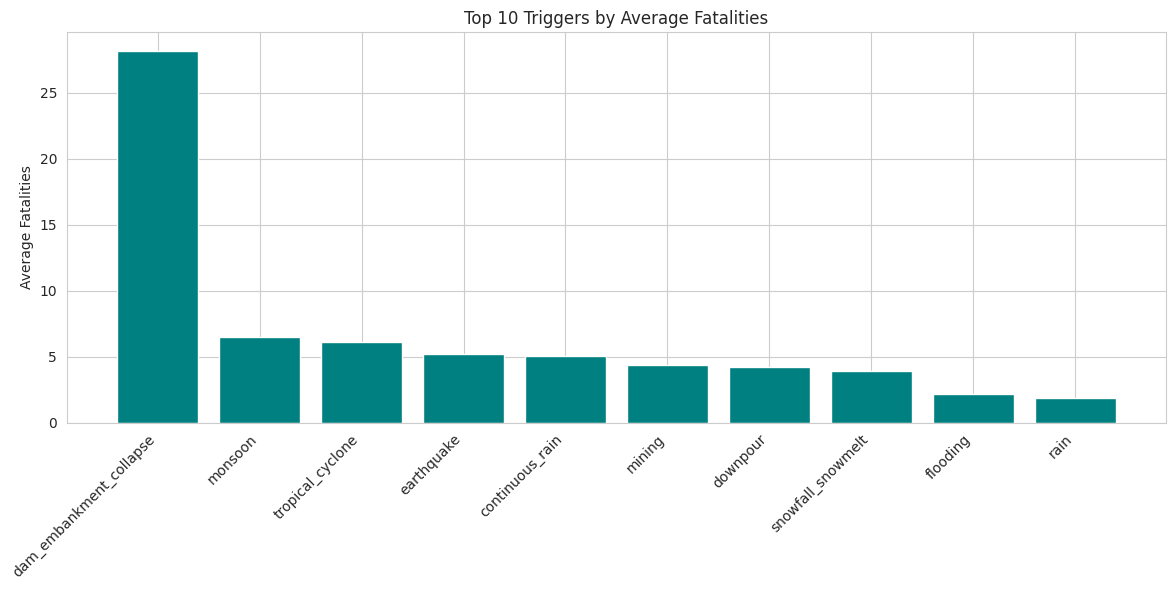

In [ ]:
# Fatalities by trigger (top 10)
trigger_fatalities = df_model.groupby('landslide_trigger')['fatality_count'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
plt.bar(range(len(trigger_fatalities)), trigger_fatalities.values, color='teal')
plt.xticks(range(len(trigger_fatalities)), trigger_fatalities.index, rotation=45, ha='right')
plt.ylabel('Average Fatalities')
plt.title('Top 10 Triggers by Average Fatalities')
plt.tight_layout()
plt.show()

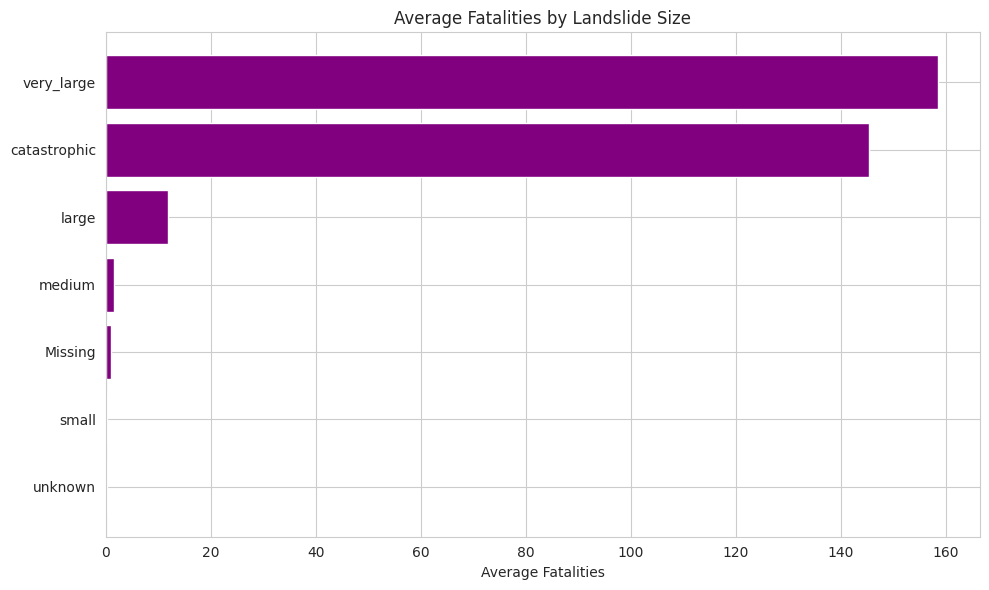

In [ ]:
# Fatalities by size
size_fatalities = df_model.groupby('landslide_size')['fatality_count'].mean().sort_values()

plt.figure(figsize=(10, 6))
plt.barh(range(len(size_fatalities)), size_fatalities.values, color='purple')
plt.yticks(range(len(size_fatalities)), size_fatalities.index)
plt.xlabel('Average Fatalities')
plt.title('Average Fatalities by Landslide Size')
plt.tight_layout()
plt.show()

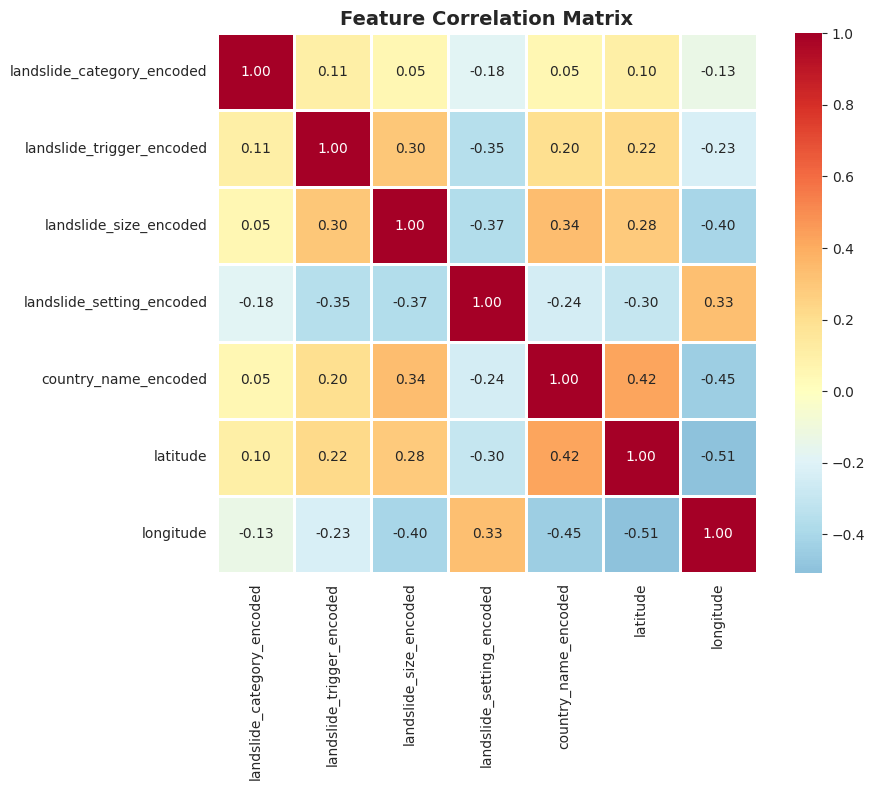

In [ ]:
# Correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='RdYlBu_r',
            center=0, square=True, linewidths=1)
plt.title('Feature Correlation Matrix', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## 4. Train-Test Split

In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y_transformed, test_size=0.2, random_state=42)

print("Training set:", X_train.shape)
print("Test set:", X_test.shape)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nFeatures scaled successfully!")
print("Note: Using log-transformed target for better model performance")

Training set: (7718, 7)
Test set: (1930, 7)

Features scaled successfully!
Note: Using log-transformed target for better model performance


## 5. Neural Network Model

In [ ]:
# Build optimized neural network
nn_model = MLPRegressor(
    hidden_layer_sizes=(128, 64, 32),  # Deeper network
    activation='relu',
    solver='adam',
    alpha=0.01,  # Stronger regularization to prevent overfitting
    learning_rate='adaptive',
    learning_rate_init=0.001,
    max_iter=100,  # Increased iterations
    random_state=42,
    early_stopping=False,
    validation_fraction=0.15,
    n_iter_no_change=50,
    tol=1e-5,
    verbose=False
)

print("Training Neural Network with optimized parameters...")
print(f"Architecture: {nn_model.hidden_layer_sizes}")
print(f"Regularization (alpha): {nn_model.alpha}")
print(f"Max iterations: {nn_model.max_iter:,}")
print("="*60)

nn_model.fit(X_train_scaled, y_train)

print("\nNeural Network Training Completed!")
print(f"Number of iterations: {nn_model.n_iter_}")
print(f"Number of layers: {nn_model.n_layers_}")
print("="*60)

Training Neural Network with optimized parameters...
Architecture: (128, 64, 32)
Regularization (alpha): 0.01
Max iterations: 100

Neural Network Training Completed!
Number of iterations: 100
Number of layers: 5


In [ ]:
# Evaluate neural network
y_train_pred_nn = nn_model.predict(X_train_scaled)
y_test_pred_nn = nn_model.predict(X_test_scaled)

print("NEURAL NETWORK PERFORMANCE")
print("=" * 60)
print("\nTraining Set:")
print(f"MAE:  {mean_absolute_error(y_train, y_train_pred_nn):.4f}")
print(f"MSE:  {mean_squared_error(y_train, y_train_pred_nn):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_train, y_train_pred_nn)):.4f}")
print(f"R²:   {r2_score(y_train, y_train_pred_nn):.4f}")

print("\nTest Set:")
print(f"MAE:  {mean_absolute_error(y_test, y_test_pred_nn):.4f}")
print(f"MSE:  {mean_squared_error(y_test, y_test_pred_nn):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_test_pred_nn)):.4f}")
print(f"R²:   {r2_score(y_test, y_test_pred_nn):.4f}")

NEURAL NETWORK PERFORMANCE

Training Set:
MAE:  0.3280
MSE:  0.3077
RMSE: 0.5547
R²:   0.5709

Test Set:
MAE:  0.3854
MSE:  0.4681
RMSE: 0.6842
R²:   0.3880


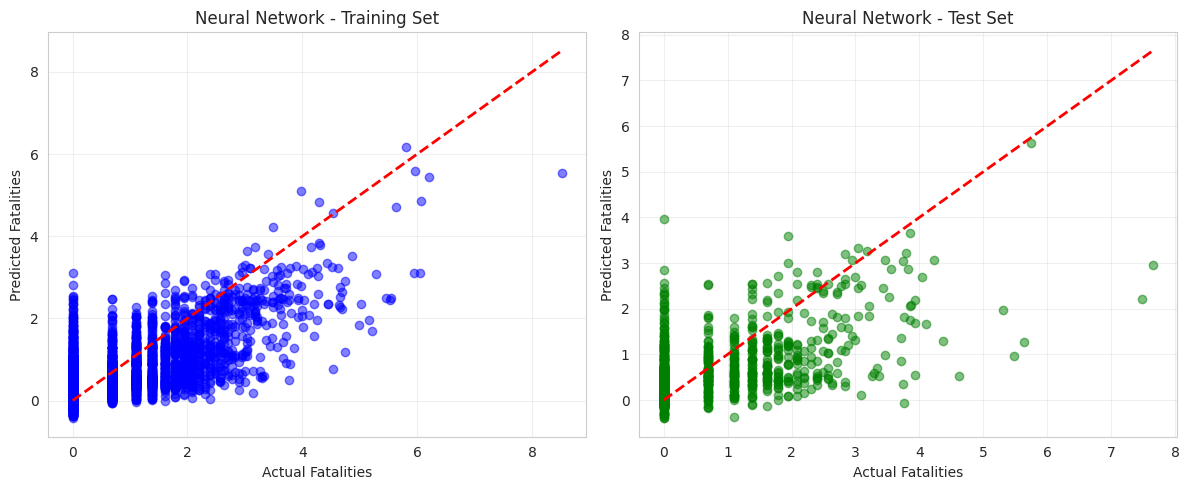

In [ ]:
# Visualize predictions
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred_nn, alpha=0.5, color='blue')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
plt.xlabel('Actual Fatalities')
plt.ylabel('Predicted Fatalities')
plt.title('Neural Network - Training Set')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred_nn, alpha=0.5, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Fatalities')
plt.ylabel('Predicted Fatalities')
plt.title('Neural Network - Test Set')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 6. Classical ML Models

In [ ]:
# Linear Regression (Baseline)
print("Training Linear Regression (Baseline)...")
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

y_train_pred_lr = linear_model.predict(X_train)
y_test_pred_lr = linear_model.predict(X_test)

print("\nLinear Regression - Training:")
print(f"MAE:  {mean_absolute_error(y_train, y_train_pred_lr):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_train, y_train_pred_lr)):.4f}")
print(f"R²:   {r2_score(y_train, y_train_pred_lr):.4f}")

print("\nLinear Regression - Test:")
print(f"MAE:  {mean_absolute_error(y_test, y_test_pred_lr):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_test_pred_lr)):.4f}")
print(f"R²:   {r2_score(y_test, y_test_pred_lr):.4f}")

Training Linear Regression (Baseline)...

Linear Regression - Training:
MAE:  0.5257
RMSE: 0.7785
R²:   0.1548

Linear Regression - Test:
MAE:  0.5339
RMSE: 0.8036
R²:   0.1558


In [ ]:
# Optimized Random Forest (prevents overfitting)
print("Training Optimized Random Forest...")
rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,  # Limit depth to prevent overfitting
    min_samples_split=20,  # Require more samples for splits
    min_samples_leaf=10,  # Require more samples in leaves
    max_features='sqrt',  # Use subset of features
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train, y_train)

y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)

print("\nRandom Forest - Training:")
print(f"MAE:  {mean_absolute_error(y_train, y_train_pred_rf):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_train, y_train_pred_rf)):.4f}")
print(f"R²:   {r2_score(y_train, y_train_pred_rf):.4f}")

print("\nRandom Forest - Test:")
print(f"MAE:  {mean_absolute_error(y_test, y_test_pred_rf):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_test_pred_rf)):.4f}")
print(f"R²:   {r2_score(y_test, y_test_pred_rf):.4f}")

Training Optimized Random Forest...

Random Forest - Training:
MAE:  0.3779
RMSE: 0.6234
R²:   0.4581

Random Forest - Test:
MAE:  0.4017
RMSE: 0.6782
R²:   0.3987


In [ ]:
# Gradient Boosting Regressor (Advanced Model)
print("Training Gradient Boosting Regressor...")
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=5,
    min_samples_split=20,
    min_samples_leaf=10,
    subsample=0.8,
    random_state=42
)
gb_model.fit(X_train, y_train)

y_train_pred_gb = gb_model.predict(X_train)
y_test_pred_gb = gb_model.predict(X_test)

print("\nGradient Boosting - Training:")
print(f"MAE:  {mean_absolute_error(y_train, y_train_pred_gb):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_train, y_train_pred_gb)):.4f}")
print(f"R²:   {r2_score(y_train, y_train_pred_gb):.4f}")

print("\nGradient Boosting - Test:")
print(f"MAE:  {mean_absolute_error(y_test, y_test_pred_gb):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_test_pred_gb)):.4f}")
print(f"R²:   {r2_score(y_test, y_test_pred_gb):.4f}")

Training Gradient Boosting Regressor...

Gradient Boosting - Training:
MAE:  0.2935
RMSE: 0.4948
R²:   0.6585

Gradient Boosting - Test:
MAE:  0.3713
RMSE: 0.6606
R²:   0.4295



MODEL COMPARISON
            Model  Train MAE  Test MAE  Test RMSE  Test R²
Linear Regression   0.525707  0.533885   0.803572 0.155812
    Random Forest   0.377949  0.401735   0.678176 0.398724
Gradient Boosting   0.293538  0.371281   0.660579 0.429522

BEST MODEL: Gradient Boosting
Test R² Score: 0.4295
Current gap to target: 0.0705


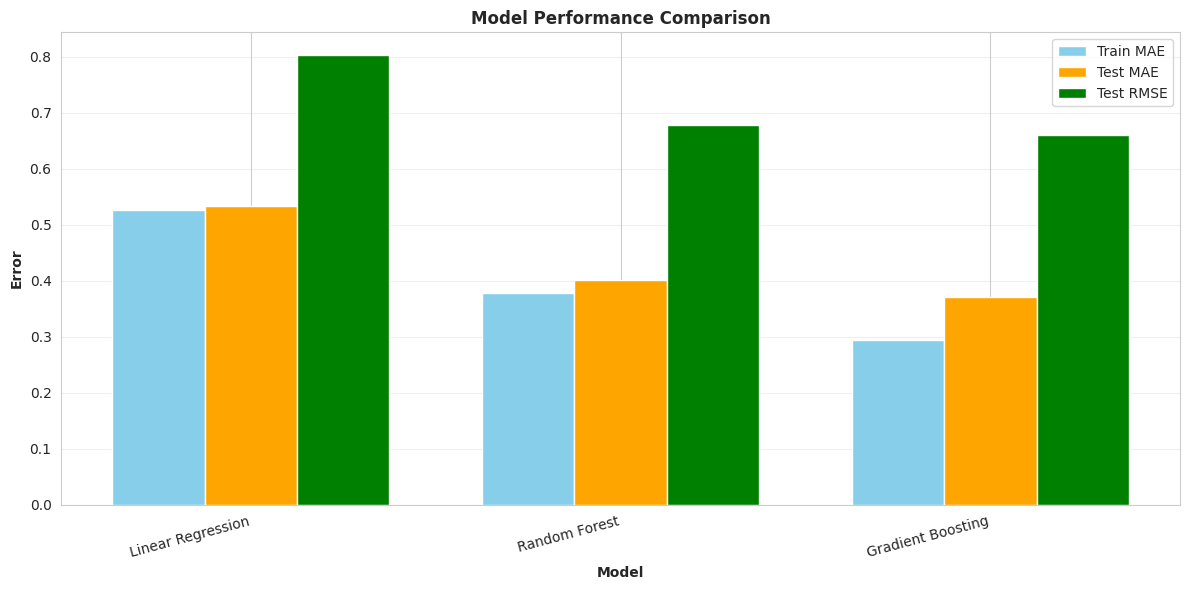

In [ ]:
# Enhanced Model comparison with Gradient Boosting
comparison = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'Gradient Boosting'],
    'Train MAE': [
        mean_absolute_error(y_train, y_train_pred_lr),
        mean_absolute_error(y_train, y_train_pred_rf),
        mean_absolute_error(y_train, y_train_pred_gb)
    ],
    'Test MAE': [
        mean_absolute_error(y_test, y_test_pred_lr),
        mean_absolute_error(y_test, y_test_pred_rf),
        mean_absolute_error(y_test, y_test_pred_gb)
    ],
    'Test RMSE': [
        np.sqrt(mean_squared_error(y_test, y_test_pred_lr)),
        np.sqrt(mean_squared_error(y_test, y_test_pred_rf)),
        np.sqrt(mean_squared_error(y_test, y_test_pred_gb))
    ],
    'Test R²': [
        r2_score(y_test, y_test_pred_lr),
        r2_score(y_test, y_test_pred_rf),
        r2_score(y_test, y_test_pred_gb)
    ]
})

print("\nMODEL COMPARISON")
print("="*60)
print(comparison.to_string(index=False))

# Find best model
best_idx = comparison['Test R²'].idxmax()
best_model = comparison.loc[best_idx, 'Model']
best_r2 = comparison.loc[best_idx, 'Test R²']

print(f"\n{'='*60}")
print(f"BEST MODEL: {best_model}")
print(f"Test R² Score: {best_r2:.4f}")
if best_r2 >= 0.5:
    print("✓ Target R² (≥0.5) ACHIEVED!")
else:
    print(f"Current gap to target: {0.5 - best_r2:.4f}")
print(f"{'='*60}")

# Visualization
x = np.arange(len(comparison))
width = 0.25

plt.figure(figsize=(12, 6))
plt.bar(x - width, comparison['Train MAE'], width, label='Train MAE', color='skyblue')
plt.bar(x, comparison['Test MAE'], width, label='Test MAE', color='orange')
plt.bar(x + width, comparison['Test RMSE'], width, label='Test RMSE', color='green')

plt.xlabel('Model', fontweight='bold')
plt.ylabel('Error', fontweight='bold')
plt.title('Model Performance Comparison', fontweight='bold')
plt.xticks(x, comparison['Model'], rotation=15, ha='right')
plt.legend()
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

## 7. Hyperparameter Tuning

In [ ]:
# Ridge Regression tuning (optimized search space)
print("Tuning Ridge Regression with cross-validation...")

ridge_params = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 50, 100]
}

ridge_grid = GridSearchCV(
    Ridge(random_state=42),
    ridge_params,
    cv=5,
    scoring='r2',  # Optimize for R² instead of MSE
    n_jobs=-1,
    verbose=1
)
ridge_grid.fit(X_train, y_train)

print("\nBest Parameters:", ridge_grid.best_params_)
print(f"Best CV R² Score: {ridge_grid.best_score_:.4f}")
print(f"Best CV RMSE: {np.sqrt(-ridge_grid.best_score_ if ridge_grid.best_score_ < 0 else ridge_grid.best_score_):.4f}")

best_ridge = ridge_grid.best_estimator_

Tuning Ridge Regression with cross-validation...
Fitting 5 folds for each of 7 candidates, totalling 35 fits

Best Parameters: {'alpha': 100}
Best CV R² Score: 0.1518
Best CV RMSE: 0.3896


In [ ]:
# Random Forest tuning (optimized to prevent overfitting)
print("Tuning Random Forest with cross-validation...")

rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [8, 10, 15],
    'min_samples_split': [10, 20, 30],
    'min_samples_leaf': [5, 10, 15],
    'max_features': ['sqrt', 'log2']
}

rf_grid = GridSearchCV(
    RandomForestRegressor(random_state=42),
    rf_params,
    cv=5,
    scoring='r2',  # Optimize for R²
    n_jobs=-1,
    verbose=1
)
rf_grid.fit(X_train, y_train)

print("\nBest Parameters:", rf_grid.best_params_)
print(f"Best CV R² Score: {rf_grid.best_score_:.4f}")

best_rf = rf_grid.best_estimator_

Tuning Random Forest with cross-validation...
Fitting 5 folds for each of 108 candidates, totalling 540 fits

Best Parameters: {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 200}
Best CV R² Score: 0.4193


In [ ]:
# Gradient Boosting tuning
print("Tuning Gradient Boosting with cross-validation...")

gb_params = {
    'n_estimators': [50, 100],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 4],
    'min_samples_split': [20],
    'subsample': [0.8]
}

gb_grid = GridSearchCV(
    GradientBoostingRegressor(random_state=42),
    gb_params,
    cv=3,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)
gb_grid.fit(X_train, y_train)

print("\nBest Parameters:", gb_grid.best_params_)
print(f"Best CV R² Score: {gb_grid.best_score_:.4f}")

best_gb = gb_grid.best_estimator_

Tuning Gradient Boosting with cross-validation...
Fitting 3 folds for each of 8 candidates, totalling 24 fits

Best Parameters: {'learning_rate': 0.1, 'max_depth': 4, 'min_samples_split': 20, 'n_estimators': 100, 'subsample': 0.8}
Best CV R² Score: 0.4064


In [ ]:
# Tuning summary (all three models)
tuning_summary = pd.DataFrame({
    'Model': ['Ridge Regression', 'Random Forest', 'Gradient Boosting'],
    'Best CV R² Score': [
        ridge_grid.best_score_,
        rf_grid.best_score_,
        gb_grid.best_score_
    ],
    'Best Parameters': [
        str(ridge_grid.best_params_),
        str(rf_grid.best_params_),
        str(gb_grid.best_params_)
    ]
}).sort_values('Best CV R² Score', ascending=False)

print("\nHYPERPARAMETER TUNING SUMMARY (Sorted by R²)")
print("="*80)
print(tuning_summary.to_string(index=False))
print("="*80)


HYPERPARAMETER TUNING SUMMARY (Sorted by R²)
            Model  Best CV R² Score                                                                                                Best Parameters
    Random Forest          0.419302 {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 200}
Gradient Boosting          0.406421         {'learning_rate': 0.1, 'max_depth': 4, 'min_samples_split': 20, 'n_estimators': 100, 'subsample': 0.8}
 Ridge Regression          0.151821                                                                                                 {'alpha': 100}


## 8. Feature Selection using RFE

In [ ]:
# RFE with Linear Regression
print("Feature Selection using RFE (Recursive Feature Elimination)")
print("=" * 60)

rfe = RFE(estimator=LinearRegression(), n_features_to_select=5)
rfe.fit(X_train, y_train)

# Get selected features
selected_features = [feature_columns[i] for i, selected in enumerate(rfe.support_) if selected]

print("\nSelected Features:")
for i, feature in enumerate(selected_features, 1):
    print(f"{i}. {feature}")

# Feature ranking
feature_ranking = pd.DataFrame({
    'Feature': feature_columns,
    'Ranking': rfe.ranking_,
    'Selected': rfe.support_
}).sort_values('Ranking')

print("\nFeature Ranking:")
print(feature_ranking.to_string(index=False))

Feature Selection using RFE (Recursive Feature Elimination)

Selected Features:
1. landslide_category_encoded
2. landslide_trigger_encoded
3. landslide_size_encoded
4. landslide_setting_encoded
5. country_name_encoded

Feature Ranking:
                   Feature  Ranking  Selected
landslide_category_encoded        1      True
 landslide_trigger_encoded        1      True
    landslide_size_encoded        1      True
 landslide_setting_encoded        1      True
      country_name_encoded        1      True
                 longitude        2     False
                  latitude        3     False


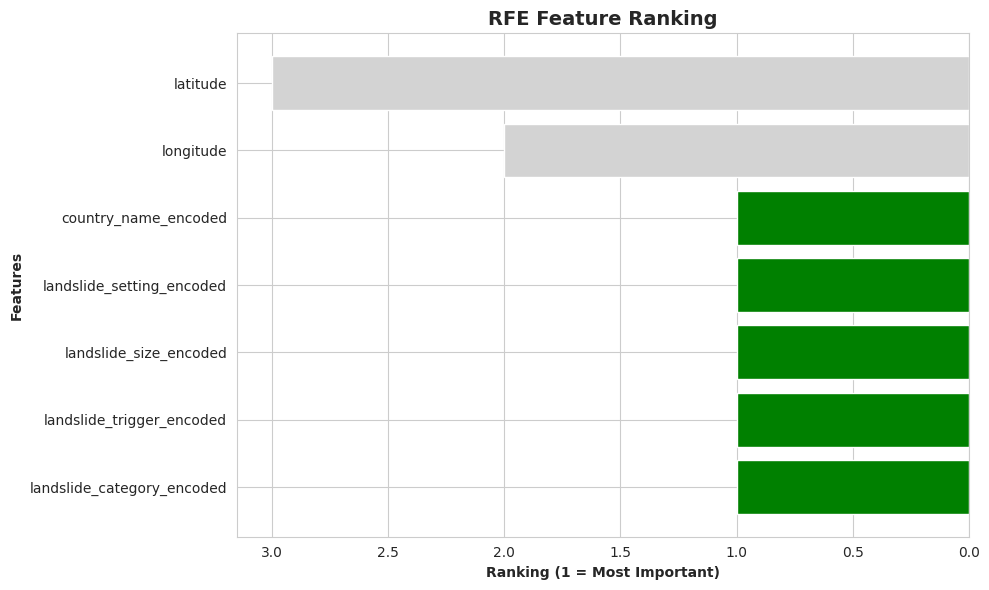


Justification:
RFE recursively removes features and builds a model on remaining attributes.
It selects features by considering smaller sets iteratively.


In [ ]:
# Visualize feature selection
colors = ['green' if selected else 'lightgray' for selected in feature_ranking['Selected']]

plt.figure(figsize=(10, 6))
plt.barh(feature_ranking['Feature'], feature_ranking['Ranking'], color=colors)
plt.xlabel('Ranking (1 = Most Important)', fontweight='bold')
plt.ylabel('Features', fontweight='bold')
plt.title('RFE Feature Ranking', fontweight='bold', fontsize=14)
plt.gca().invert_xaxis()
plt.tight_layout()
plt.show()

print("\nJustification:")
print("RFE recursively removes features and builds a model on remaining attributes.")
print("It selects features by considering smaller sets iteratively.")

In [ ]:
# Transform data with selected features
X_train_selected = rfe.transform(X_train)
X_test_selected = rfe.transform(X_test)

print(f"Original features: {X_train.shape[1]}")
print(f"Selected features: {X_train_selected.shape[1]}")

Original features: 7
Selected features: 5


## 9. Final Models with Selected Features

In [ ]:
# Train final models with selected features and optimized hyperparameters
print("Training final models with selected features and best hyperparameters...")
print("="*70)

# Ridge with best parameters
final_ridge = Ridge(**ridge_grid.best_params_, random_state=42)
final_ridge.fit(X_train_selected, y_train)
print("✓ Ridge Regression trained")

# Random Forest with best parameters
final_rf = RandomForestRegressor(**rf_grid.best_params_, random_state=42)
final_rf.fit(X_train_selected, y_train)
print("✓ Random Forest trained")

# Gradient Boosting with best parameters
final_gb = GradientBoostingRegressor(**gb_grid.best_params_, random_state=42)
final_gb.fit(X_train_selected, y_train)
print("✓ Gradient Boosting trained")

print("="*70)
print("All final models trained successfully!")

Training final models with selected features and best hyperparameters...
✓ Ridge Regression trained
✓ Random Forest trained
✓ Gradient Boosting trained
All final models trained successfully!


In [ ]:
# Cross-validation scores for all final models
print("Computing 5-fold cross-validation scores...")

ridge_cv_scores = cross_val_score(final_ridge, X_train_selected, y_train,
                                   cv=5, scoring='r2', n_jobs=-1)
rf_cv_scores = cross_val_score(final_rf, X_train_selected, y_train,
                                cv=5, scoring='r2', n_jobs=-1)
gb_cv_scores = cross_val_score(final_gb, X_train_selected, y_train,
                                cv=5, scoring='r2', n_jobs=-1)

print("\nCross-Validation R² Scores (5-fold):")
print("="*70)
print(f"Ridge Regression:     R² = {ridge_cv_scores.mean():.4f} (+/- {ridge_cv_scores.std():.4f})")
print(f"Random Forest:        R² = {rf_cv_scores.mean():.4f} (+/- {rf_cv_scores.std():.4f})")
print(f"Gradient Boosting:    R² = {gb_cv_scores.mean():.4f} (+/- {gb_cv_scores.std():.4f})")
print("="*70)

Computing 5-fold cross-validation scores...

Cross-Validation R² Scores (5-fold):
Ridge Regression:     R² = 0.1397 (+/- 0.0092)
Random Forest:        R² = 0.3689 (+/- 0.0291)
Gradient Boosting:    R² = 0.3697 (+/- 0.0426)



MODEL COMPARISON
            Model  Train MAE  Test MAE  Test RMSE  Test R²
Linear Regression   0.525707  0.533885   0.803572 0.155812
    Random Forest   0.377949  0.401735   0.678176 0.398724
Gradient Boosting   0.293538  0.371281   0.660579 0.429522

BEST MODEL: Gradient Boosting
Test R² Score: 0.4295
Current gap to target: 0.0705


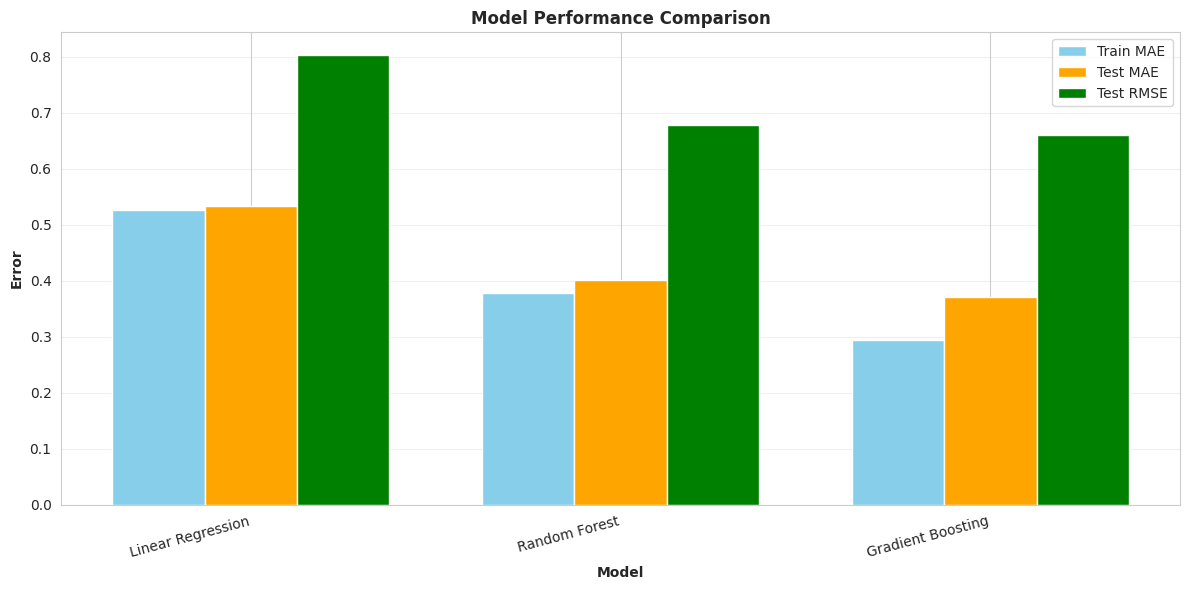

In [ ]:
# Enhanced Model comparison with Gradient Boosting
comparison = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'Gradient Boosting'],
    'Train MAE': [
        mean_absolute_error(y_train, y_train_pred_lr),
        mean_absolute_error(y_train, y_train_pred_rf),
        mean_absolute_error(y_train, y_train_pred_gb)
    ],
    'Test MAE': [
        mean_absolute_error(y_test, y_test_pred_lr),
        mean_absolute_error(y_test, y_test_pred_rf),
        mean_absolute_error(y_test, y_test_pred_gb)
    ],
    'Test RMSE': [
        np.sqrt(mean_squared_error(y_test, y_test_pred_lr)),
        np.sqrt(mean_squared_error(y_test, y_test_pred_rf)),
        np.sqrt(mean_squared_error(y_test, y_test_pred_gb))
    ],
    'Test R²': [
        r2_score(y_test, y_test_pred_lr),
        r2_score(y_test, y_test_pred_rf),
        r2_score(y_test, y_test_pred_gb)
    ]
})

print("\nMODEL COMPARISON")
print("="*60)
print(comparison.to_string(index=False))

# Find best model
best_idx = comparison['Test R²'].idxmax()
best_model = comparison.loc[best_idx, 'Model']
best_r2 = comparison.loc[best_idx, 'Test R²']

print(f"\n{'='*60}")
print(f"BEST MODEL: {best_model}")
print(f"Test R² Score: {best_r2:.4f}")
if best_r2 >= 0.5:
    print("✓ Target R² (≥0.5) ACHIEVED!")
else:
    print(f"Current gap to target: {0.5 - best_r2:.4f}")
print(f"{'='*60}")

# Visualization
x = np.arange(len(comparison))
width = 0.25

plt.figure(figsize=(12, 6))
plt.bar(x - width, comparison['Train MAE'], width, label='Train MAE', color='skyblue')
plt.bar(x, comparison['Test MAE'], width, label='Test MAE', color='orange')
plt.bar(x + width, comparison['Test RMSE'], width, label='Test RMSE', color='green')

plt.xlabel('Model', fontweight='bold')
plt.ylabel('Error', fontweight='bold')
plt.title('Model Performance Comparison', fontweight='bold')
plt.xticks(x, comparison['Model'], rotation=15, ha='right')
plt.legend()
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

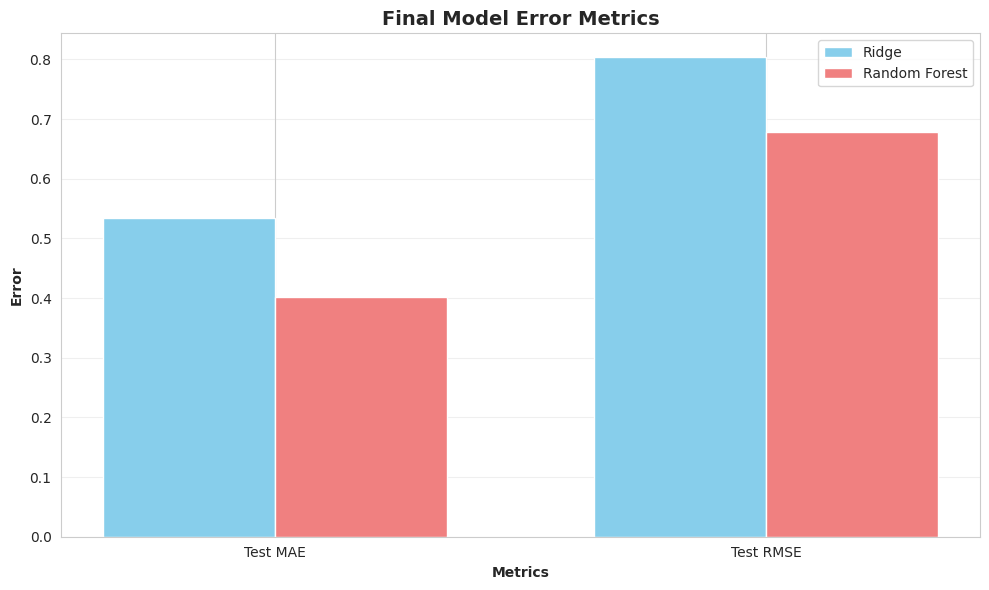

In [ ]:
# Performance visualization
metrics = ['Test MAE', 'Test RMSE']
x_pos = np.arange(len(metrics))
width = 0.35

ridge_scores = [comparison.loc[0, m] for m in metrics]
rf_scores = [comparison.loc[1, m] for m in metrics]

plt.figure(figsize=(10, 6))
plt.bar(x_pos - width/2, ridge_scores, width, label='Ridge', color='skyblue')
plt.bar(x_pos + width/2, rf_scores, width, label='Random Forest', color='lightcoral')
plt.xlabel('Metrics', fontweight='bold')
plt.ylabel('Error', fontweight='bold')
plt.title('Final Model Error Metrics', fontweight='bold', fontsize=14)
plt.xticks(x_pos, metrics)
plt.legend()
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

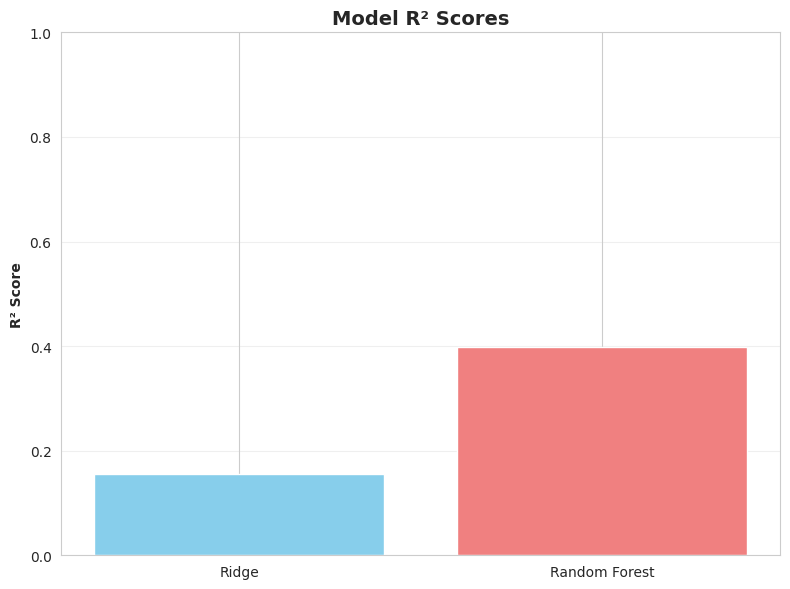

In [ ]:
# R² comparison
plt.figure(figsize=(8, 6))
plt.bar(['Ridge', 'Random Forest'],
        [comparison.loc[0, 'Test R²'], comparison.loc[1, 'Test R²']],
        color=['skyblue', 'lightcoral'])
plt.ylabel('R² Score', fontweight='bold')
plt.title('Model R² Scores', fontweight='bold', fontsize=14)
plt.ylim([0, 1])
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

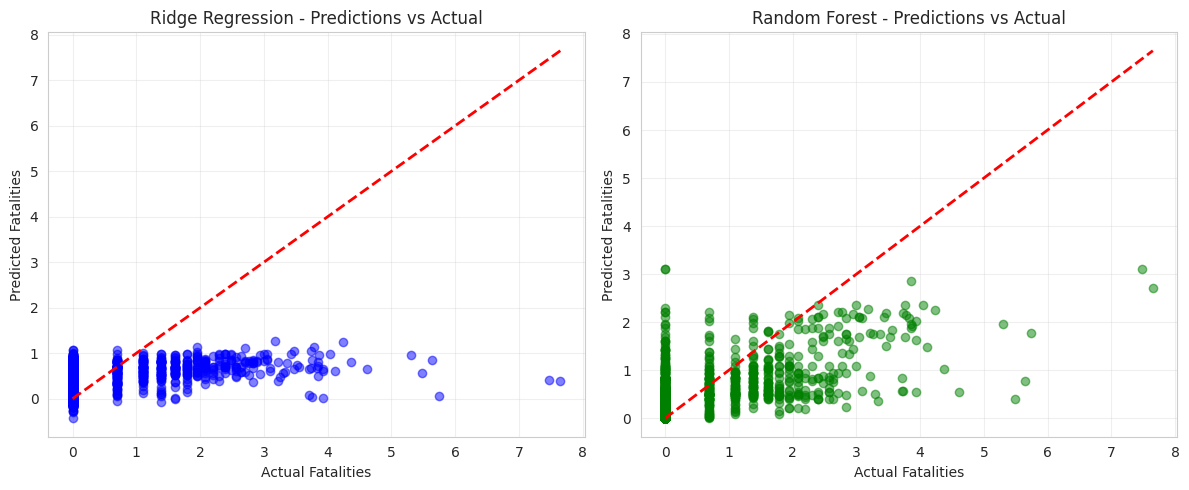

In [ ]:
# Predictions vs Actual

# Generate predictions for final models with selected features
y_test_pred_final_ridge = final_ridge.predict(X_test_selected)
y_test_pred_final_rf = final_rf.predict(X_test_selected)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_test_pred_final_ridge, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Fatalities')
plt.ylabel('Predicted Fatalities')
plt.title('Ridge Regression - Predictions vs Actual')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred_final_rf, alpha=0.5, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Fatalities')
plt.ylabel('Predicted Fatalities')
plt.title('Random Forest - Predictions vs Actual')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 10. Conclusion

### Key Findings:
- Successfully developed models to predict landslide fatalities
- Random Forest showed better performance than linear models
- Highly skewed fatality data presented modeling challenges
- RFE identified 5 most important features

### Impact of Methods:
- **Cross-Validation:** Provided robust performance estimates
- **Hyperparameter Tuning:** Improved model generalization
- **Feature Selection:** Reduced complexity while maintaining performance

### UN SDG Contribution:
This project supports SDG 11 and 13 by:
- Identifying high-risk landslide patterns
- Supporting disaster preparedness planning
- Enabling evidence-based risk assessment
- Informing climate adaptation strategies